# Artificial neural networks


Based on https://github.com/vincenzorrei/EDU-ArtificialNeuralNetworks

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score

from imblearn.over_sampling import SMOTENC

import pickle

import src.features as features
import src.model_selection as model_selection 
import src.functions as functions
import src.datasets as datasets 

In [5]:
### Load dataset
data = datasets.data_original()
### Feature engineering 
data = features.engineer(data)
### Train test split (unprocessed)
X_, y_ = data.drop('infected', axis=1), data['infected']
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size = 0.2, random_state=42, stratify = y_)


### Scaling the data 

In [7]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_)
X_test_scaled = scaler.transform(X_test_)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train_.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test_.columns)

In [10]:
X_train = X_train_scaled
X_test = X_test_scaled
y_train = y_train_
y_test = y_test_

## Multilayer Perceptrons with Scikit-learn

In [16]:
from sklearn.neural_network import MLPClassifier


### Define and train the model

In [17]:

# Define the model
model = MLPClassifier(hidden_layer_sizes=(128, 128, 128), activation='logistic', solver='adam', max_iter=200, verbose = True)

# Fit the model
model.fit(X_train, y_train)

Iteration 1, loss = 0.61516069
Iteration 2, loss = 0.56704067
Iteration 3, loss = 0.55454334
Iteration 4, loss = 0.55454819
Iteration 5, loss = 0.55009912
Iteration 6, loss = 0.54755315
Iteration 7, loss = 0.54226915
Iteration 8, loss = 0.53488227
Iteration 9, loss = 0.52325654
Iteration 10, loss = 0.50646118
Iteration 11, loss = 0.48429738
Iteration 12, loss = 0.45849433
Iteration 13, loss = 0.43256159
Iteration 14, loss = 0.40749256
Iteration 15, loss = 0.38706219
Iteration 16, loss = 0.37060902
Iteration 17, loss = 0.35777758
Iteration 18, loss = 0.34713350
Iteration 19, loss = 0.33710762
Iteration 20, loss = 0.32808509
Iteration 21, loss = 0.31898422
Iteration 22, loss = 0.31450584
Iteration 23, loss = 0.30650516
Iteration 24, loss = 0.29675827
Iteration 25, loss = 0.29029657
Iteration 26, loss = 0.28326645
Iteration 27, loss = 0.27767917
Iteration 28, loss = 0.27065104
Iteration 29, loss = 0.26547437
Iteration 30, loss = 0.26165863
Iteration 31, loss = 0.26077715
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(128, 128, 128),
              verbose=True)

### Evaluate the MLP classifier

In [22]:
y_pred = model.predict(X_test)

results_test_mlp = {
    "model": "mlp 128 128 128",
    "accuracy": accuracy_score(y_test,y_pred),
    "recall": recall_score(y_test,y_pred),
    "selectivity": recall_score(y_test,y_pred,pos_label = 0),
    "f1": f1_score(y_test,y_pred),
    "f3": fbeta_score(y_test,y_pred,beta = 3),
    "precision": precision_score(y_test,y_pred),
    "NPV": precision_score(y_test,y_pred, pos_label = 0)
}

pd.DataFrame([results_test_mlp])

,model,accuracy,recall,selectivity,f1,f3,precision,NPV
0,mlp 128 128 128,0.913551,0.740385,0.969136,0.806283,0.752688,0.885057,0.920821


## Train on oversampled data

### Oversampling train data 

In [23]:
# identify categorical features 
# The dataset does not have categorical features with more than 4 categories
cat_features = [c for c in X_train_.columns if X_train_[c].nunique() < 5]

In [26]:
smote_nc = SMOTENC(categorical_features=cat_features, sampling_strategy=1.0, random_state=42)
X_train_oversampled, y_train_oversampled = smote_nc.fit_resample(X_train_, y_train_) 

### Scaling the data 

In [27]:
scaler = StandardScaler()

scaler.fit(X_train_)

X_train_scaled_oversampled = scaler.transform(X_train_oversampled)
X_test_scaled = scaler.transform(X_test_)

### Data ready for Machine Learning

In [28]:
X_train =pd.DataFrame(X_train_scaled_oversampled,columns=X_.columns)
X_test =pd.DataFrame(X_test_scaled,columns=X_.columns)
y_train = y_train_oversampled 
y_test = y_test_ 

### Train the MLP model

In [39]:

# Define the model
model = MLPClassifier(hidden_layer_sizes=(128, 128, 128), activation='logistic', solver='adam', max_iter=200, verbose = True)

# Fit the model
history = model.fit(X_train, y_train)

Iteration 1, loss = 0.69519893
Iteration 2, loss = 0.68931457
Iteration 3, loss = 0.67901228
Iteration 4, loss = 0.64436125
Iteration 5, loss = 0.56413990
Iteration 6, loss = 0.46499139
Iteration 7, loss = 0.40426257
Iteration 8, loss = 0.36940668
Iteration 9, loss = 0.34536524
Iteration 10, loss = 0.32510226
Iteration 11, loss = 0.30224159
Iteration 12, loss = 0.28776092
Iteration 13, loss = 0.27553420
Iteration 14, loss = 0.26859732
Iteration 15, loss = 0.25531461
Iteration 16, loss = 0.25170545
Iteration 17, loss = 0.24373470
Iteration 18, loss = 0.23901836
Iteration 19, loss = 0.23805574
Iteration 20, loss = 0.23769522
Iteration 21, loss = 0.23695337
Iteration 22, loss = 0.23945921
Iteration 23, loss = 0.23566681
Iteration 24, loss = 0.23355417
Iteration 25, loss = 0.23120328
Iteration 26, loss = 0.23002371
Iteration 27, loss = 0.23106313
Iteration 28, loss = 0.23010443
Iteration 29, loss = 0.23157799
Iteration 30, loss = 0.23215236
Iteration 31, loss = 0.23097724
Iteration 32, los

### Loss curve


<Axes: >

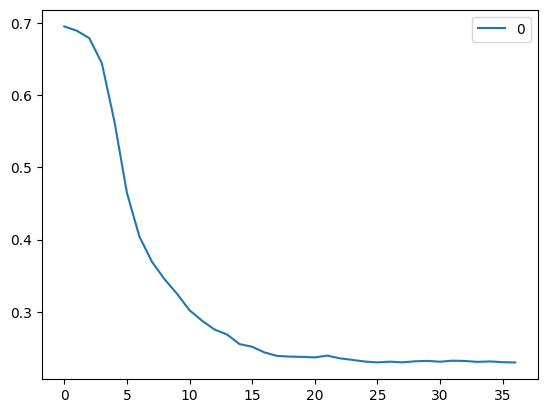

In [40]:
pd.DataFrame(model.loss_curve_).plot()


### Evaluate the MLP classifier

In [30]:
y_pred = model.predict(X_test)

results_test_mlp = {
    "model": "mlp 128 128 128 oversampled",
    "accuracy": accuracy_score(y_test,y_pred),
    "recall": recall_score(y_test,y_pred),
    "selectivity": recall_score(y_test,y_pred,pos_label = 0),
    "f1": f1_score(y_test,y_pred),
    "f3": fbeta_score(y_test,y_pred,beta = 3),
    "precision": precision_score(y_test,y_pred),
    "NPV": precision_score(y_test,y_pred, pos_label = 0)
}

pd.DataFrame([results_test_mlp])

,model,accuracy,recall,selectivity,f1,f3,precision,NPV
0,mlp 128 128 128,0.878505,0.817308,0.898148,0.765766,0.806452,0.720339,0.93871


### Save the model


In [38]:
import pickle

In [41]:
filename = "models/neural_network_dense-128-128-128_on_oversampled.pkl"
#with open(filename,"wb") as file:
    #pickle.dump(model, file)

## Tensorflow (not supported on Python 3.13)

In [1]:
"""
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
"""

ModuleNotFoundError: No module named 'tensorflow'